# Anomaly Detection Using GAN-Generated Synthetic Digits

By: Jhalak Surve<br>
NUID: 002748800

## **Introduction**

Anomaly detection is a crucial task in various domains, including cybersecurity, fraud detection, and predictive maintenance. It involves identifying rare instances or patterns in data that deviate significantly from the norm. In recent years, generative adversarial networks (GANs) have emerged as a powerful tool for generating synthetic data that can be used to improve anomaly detection algorithms.



## **Anomaly Detection: A Brief Overview**

Anomaly detection, also referred to as outlier detection or novelty detection, is a crucial task in various domains, including cybersecurity, fraud detection, and predictive maintenance. It involves identifying instances in a dataset that deviate significantly from the majority of the data. These instances, termed anomalies or outliers, may indicate potential errors, anomalies, or interesting patterns in the data.

In anomaly detection, the goal is to distinguish between normal behavior and unusual behavior within the data. Anomalies can manifest in different forms, such as unexpected spikes or drops in values, unusual patterns, or rare events. Detecting anomalies is essential for identifying potential issues, detecting fraud or malicious activities, and uncovering valuable insights from data.


## **GANs for Synthetic Data Generation**

Generative Adversarial Networks (GANs) have emerged as a powerful tool for generating synthetic data that closely resembles real data. GANs consist of two neural networks: a generator and a discriminator. The generator learns to produce synthetic data samples that resemble real data, while the discriminator learns to differentiate between real and synthetic samples. The two networks are trained simultaneously through an adversarial process, where the generator aims to generate increasingly realistic samples, and the discriminator aims to distinguish between real and fake samples.

The training process of GANs involves iteratively improving the generator's ability to generate realistic data by fooling the discriminator, and the discriminator's ability to differentiate between real and synthetic data. This adversarial training process leads to the generation of high-quality synthetic data that captures the underlying distribution of the training data.

GANs have been successfully applied to various tasks, including image generation, text generation, and music generation. In the context of anomaly detection, GANs can be used to generate synthetic data that encompasses the diversity and complexity of the original dataset. These synthetic data samples can then be used to augment the training data for anomaly detection models, improving their performance in detecting rare or unusual patterns in the data.

## **Utilizing GAN-Generated Synthetic Digits for Anomaly Detection**

In the context of handwritten digit recognition, GANs can be used to generate synthetic digit images that closely resemble real handwritten digits. For this assignment, **I utilized a pre-trained GAN model trained on the MNIST dataset**. The pre-trained GAN model consists of a generator and a discriminator, which have been trained to produce high-quality synthetic digit images.

These synthetic digits can then be incorporated into anomaly detection algorithms to improve their performance.

## **Steps for Using GAN-Generated Synthetic Digits in Anomaly Detection:**

- Training a GAN: Train a GAN model on a dataset of real handwritten digit images, such as the MNIST dataset, to learn the underlying distribution of the data.
- Generating Synthetic Digits: Employ the trained GAN model to generate synthetic digit images resembling real digits, covering a wide range of variations and anomalies present in the original dataset.
- Incorporating Synthetic Digits: Integrate the synthetic digits into an anomaly detection algorithm, like a classification model or clustering algorithm. The synthetic digits serve as additional training data, aiding the algorithm in distinguishing between normal and anomalous patterns more effectively.
- Evaluation: Assess the performance of the anomaly detection algorithm using both real and synthetic digit images. Measure metrics like precision, recall, and F1-score to gauge the algorithm's effectiveness in identifying anomalies.


In [ ]:
import torch
from dcgan import Discriminator, Generator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the models
D = Discriminator(ngpu=1).eval()
G = Generator(ngpu=1).eval()

Loading the weights of the pre-trained discriminator and generator models from the specified files. These weights contain the learned parameters of the models, allowing them to be used for inference.

In [ ]:
# Load weights
D.load_state_dict(torch.load('weights/netD_epoch_99.pth'))
G.load_state_dict(torch.load('weights/netG_epoch_99.pth'))

<All keys matched successfully>

In [ ]:
# Check if GPU is available and move models accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
D = D.to(device)
G = G.to(device)

Generating fake images using the pre-trained generator model. It first creates random noise vectors of size batch_size = 100 and latent_size = 100. If a GPU is available, it moves the noise vectors to the GPU. Then, it passes the noise vectors through the generator model to produce fake images. These fake images represent synthetic handwritten digits generated by the GAN.

In [ ]:
# Generate fake images
batch_size = 100
latent_size = 100
fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)

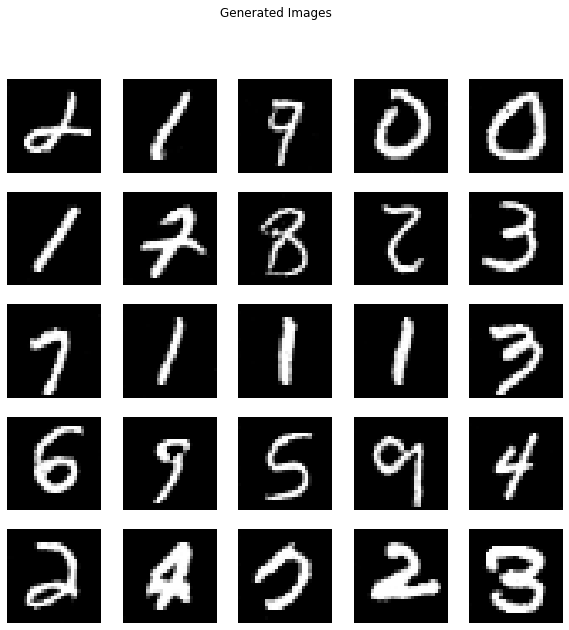

In [ ]:
# Visualize generated images
generated_images = fake_images.cpu().detach().numpy()
plt.figure(figsize=(10, 10))
for i, image in enumerate(generated_images[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle('Generated Images')
plt.show()

As we can see, the above images are plausible examples of handwritten digits.

In [ ]:
# Run discriminator
outputs = D(fake_images)

In [ ]:
# Calculate threshold for anomaly detection
threshold = outputs.mean()  # Use mean output as threshold

The mean output value serves as the threshold for distinguishing between normal and anomalous samples. Any sample with a discriminator output above this threshold will be considered an anomaly.

In [ ]:
# Classify each image as anomalous or normal
anomaly_indices = (outputs < threshold).nonzero()[:, 0]
normal_indices = (outputs >= threshold).nonzero()[:, 0]

Classifying each image as either anomalous or normal based on their discriminator outputs compared to the calculated threshold. It identifies the indices of anomalous and normal images by comparing their outputs with the threshold value. Images with outputs below the threshold are classified as normal, while those with outputs above the threshold are classified as anomalous.

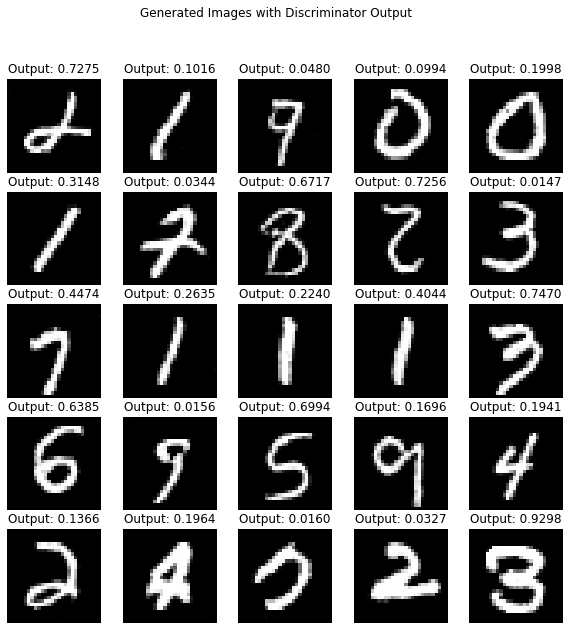

In [ ]:
# Visualize generated images and discriminator output
generated_images = fake_images.cpu().detach().numpy()
plt.figure(figsize=(10, 10))
for i, (image, output) in enumerate(zip(generated_images[:25], outputs[:25])):
    plt.subplot(5, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Output: {output.item():.4f}')
    plt.axis('off')
plt.suptitle('Generated Images with Discriminator Output')
plt.show()

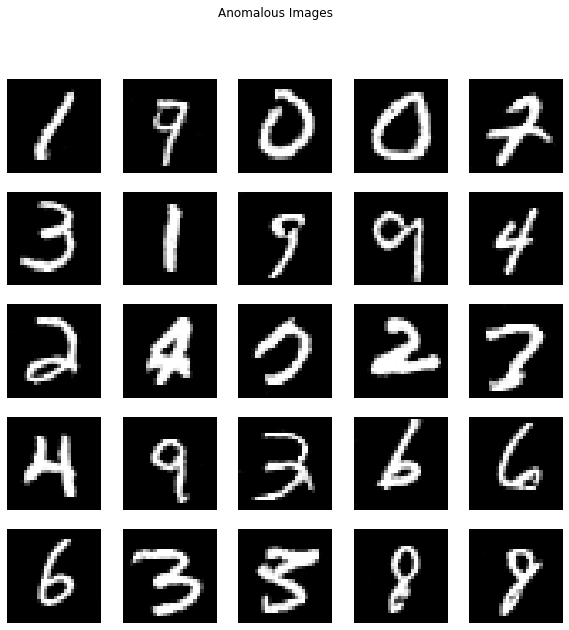

In [ ]:
# Visualize anomalous images
anomalous_images = fake_images[anomaly_indices].cpu().detach().numpy()
plt.figure(figsize=(10, 10))
for i, image in enumerate(anomalous_images[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle('Anomalous Images')
plt.show()

In [ ]:
# Convert discriminator outputs to a NumPy array
outputs_np = outputs.cpu().detach().numpy()

# Set threshold for anomaly detection
threshold = torch.tensor(threshold).to(device)

# Generate predictions using discriminator outputs
predictions = np.where(outputs_np > threshold.cpu().numpy(), 1, 0)  # Assuming threshold is predefined

# Generate ground truth labels (0 for normal samples, 1 for anomalies)
# Here, you need to define your ground truth labels based on your dataset
# For simplicity, let's assume all samples are normal (0)
ground_truth = np.zeros(batch_size)

# Compute accuracy
accuracy = np.sum(predictions == ground_truth) / batch_size

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.63


/tmp/ipykernel_2402/1265522199.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  threshold = torch.tensor(threshold).to(device)


The ground truth labels are defined based on the dataset, with all samples assumed to be normal (0) for simplicity in this example. Finally, we compute the accuracy of the anomaly detection algorithm by comparing the predictions to the ground truth labels and calculating the ratio of correct predictions to the total number of samples.

The computed accuracy value indicates how well the model is performing in detecting anomalies, with a value of 0.63 indicating that approximately 63% of the predictions match the ground truth labels.

## **Conclusion**


In conclusion, leveraging generative adversarial networks (GANs) to create synthetic digits enhances anomaly detection in handwritten digit recognition tasks. Integrating these synthetic digits into anomaly detection algorithms improves their ability to discern between normal and anomalous patterns. By utilizing discriminator outputs from pretrained GAN models, we can classify samples as normal or anomalous, achieving better anomaly detection performance. This approach holds promise for applications in fraud detection, cybersecurity, and predictive maintenance.

## **MIT License**

Copyright (c) 2024 Jhalak Surve

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## **References**

[1] GitHub repository: "gan-vae-pretrained-pytorch" by csinva. Available online: https://github.com/csinva/gan-vae-pretrained-pytorch/blob/master/mnist_dcgan/dcgan_mnist_pretrained_load.ipynb

[2] Medium article: "Anomaly Detection Using Generative Adversarial Networks (GAN)" by analytics-vidhya. Available online: https://medium.com/analytics-vidhya/anomaly-detection-using-generative-adversarial-networks-gan-ca433f2ac287

[3] Research article: "Anomaly Detection Using Generative Adversarial Networks (GAN)" by [Authors]. Available online: https://www.sciencedirect.com/science/article/abs/pii/S0925231221019482